# XGBoost Classification

pip install category_encoders

conda install dask or pip install "dask[complete]"

[Fraud Detection](https://www.kaggle.com/c/ieee-fraud-detection/data)

![Namespace Labs](../../../../labs.png)

### Installation

pip install xgboost

In [1]:
import dask.dataframe as dd

In [2]:
train_transaction = dd.read_csv("train_transaction.csv")

In [3]:
categorical_features = ['ProductCD','card1','card2',
                        'card3','card4','card5','card6',
                       'addr1', 'addr2','P_emaildomain','R_emaildomain']

In [4]:
train_transaction = train_transaction[['isFraud',
 'TransactionAmt', 'ProductCD',
 'card1','card2','card3','card4','card5','card6',
 'addr1','addr2',
 'dist1','dist2',
 'P_emaildomain','R_emaildomain',
 'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
 'D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15']].compute()

In [171]:
from category_encoders import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(cols=categorical_features, handle_missing='return_nan')

transaction = ordinal_encoder.fit_transform(train_transaction)
transaction.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,0,68.50,1.00,1.00,nan,1.00,1.00,1.00,1.00,1.00,1.00,19.00,nan,nan,nan,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,nan,13.00,nan,nan,nan,nan,nan,nan,13.00,13.00,nan,nan,nan,0.00
1,0,29.00,1.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,1.00,nan,nan,2.00,nan,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan,0.00
2,0,59.00,1.00,3.00,3.00,1.00,3.00,3.00,2.00,3.00,1.00,287.00,nan,3.00,nan,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,315.00,nan,nan,nan,315.00
3,0,50.00,1.00,4.00,4.00,1.00,2.00,4.00,2.00,4.00,1.00,nan,nan,4.00,nan,2.00,5.00,0.00,0.00,0.00,4.00,0.00,0.00,1.00,0.00,1.00,0.00,25.00,1.00,112.00,112.00,0.00,94.00,0.00,nan,nan,nan,nan,84.00,nan,nan,nan,nan,111.00
4,0,50.00,2.00,5.00,5.00,1.00,2.00,2.00,1.00,5.00,1.00,nan,nan,2.00,nan,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
X = transaction.drop(['isFraud'],axis=1)

In [ ]:
y = transaction['isFraud']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [ ]:
import xgboost as xgb


In [ ]:
model=xgb.XGBClassifier(random_state=145,learning_rate=0.01)


In [187]:
model.fit(X_train,y_train)    


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=145,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [190]:
accuracy_score(predictions, y_test)

0.9705209418273089

In [191]:
confusion_matrix(predictions, y_test)

array([[112921,   3314],
       [   139,    760]])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

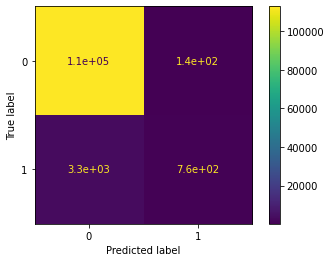

In [193]:
plot_confusion_matrix(model,X_test,y_test)

In [194]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    116235
           1       0.19      0.85      0.31       899

    accuracy                           0.97    117134
   macro avg       0.59      0.91      0.65    117134
weighted avg       0.99      0.97      0.98    117134



Happy Coding!